# __2. Credit Risk Modelling:__ Preprocessing and Feature Selection
## by: __Aprian Immanuel__ (087785160835 / immanuelaprian@gmail.com)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('precredit_train.csv', delimiter=';') #import dataset
df = df.drop(['NULL', 'MyUnknownColumn', 'LN_ID.1', 'MyUnknownColumn.1', 'SK_ID_PREV.1', 'LN_ID.2', 'CONTRACT_STATUS'], axis=1) #drop unnecessary feature
df = df.rename(columns={'CONTRACT_TYPE.1' : 'CONTRACT_TYPE_PREV_APP', 'ANNUITY.1' : 'ANNUITY_PREV_APP', 'PRICE.1':'PRICE_PREV_APP', 'WEEKDAYS_APPLY.1':'WEEKKDAYS_APPLY_PREV_APP', 'HOUR_APPLY.1': 'HOUR_APPLY_PREV_APP', 'APPROVED_CREDIT.1':'APPROVED_CREDIT_PREV_APP'}, inplace=False) #rename feature
df.head()

,LN_ID,TARGET,CONTRACT_TYPE,GENDER,NUM_CHILDREN,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,INCOME_TYPE,...,PRICE_PREV_APP,WEEKKDAYS_APPLY_PREV_APP,HOUR_APPLY_PREV_APP,DAYS_DECISION,TERM_PAYMENT,YIELD_GROUP,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,198658,0,Cash loans,F,0,207000.0,1125000.0,47794.5,1125000.0,Working,...,1.069411e+05,SUNDAY,17,-343,10.0,low_normal,365243.0,-308.0,-35.0,0.0
1,186157,0,Cash loans,F,1,112500.0,152820.0,16177.5,135000.0,Commercial associate,...,4.913960e+07,SATURDAY,15,-2713,10.0,high,365243.0,-2682.0,-2495.0,1.0
2,176791,0,Cash loans,M,0,139500.0,339948.0,26437.5,315000.0,Working,...,6.137505e+04,SUNDAY,11,-2424,16.0,high,365243.0,-2393.0,-1941.0,1.0
3,155702,0,Cash loans,M,0,135000.0,640080.0,31261.5,450000.0,State servant,...,2.965500e+04,THURSDAY,13,-2393,6.0,high,365243.0,-2362.0,-2215.0,1.0
4,170611,0,Cash loans,M,0,135000.0,199080.0,14557.5,157500.0,Working,...,4.070871e+08,TUESDAY,10,-1150,24.0,middle,365243.0,-1120.0,-424.0,1.0


In [3]:
df.columns

Index(['LN_ID', 'TARGET', 'CONTRACT_TYPE', 'GENDER', 'NUM_CHILDREN', 'INCOME',
       'APPROVED_CREDIT', 'ANNUITY', 'PRICE', 'INCOME_TYPE', 'EDUCATION',
       'FAMILY_STATUS', 'HOUSING_TYPE', 'DAYS_AGE', 'DAYS_WORK',
       'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'WEEKDAYS_APPLY', 'HOUR_APPLY',
       'ORGANIZATION_TYPE', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3',
       'SK_ID_PREV', 'INST_NUMBER', 'INST_DAYS', 'PAY_DAYS', 'AMT_INST',
       'AMT_PAY', 'CONTRACT_TYPE_PREV_APP', 'ANNUITY_PREV_APP', 'APPLICATION',
       'APPROVED_CREDIT_PREV_APP', 'AMT_DOWN_PAYMENT', 'PRICE_PREV_APP',
       'WEEKKDAYS_APPLY_PREV_APP', 'HOUR_APPLY_PREV_APP', 'DAYS_DECISION',
       'TERM_PAYMENT', 'YIELD_GROUP', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

## __1. Value Encoding:__ This step is for preparing the dataset to be ready feature selected and modelled
### a. INCOME TYPE

In [4]:
df_new = df.copy()
df_new = df_new.dropna(axis=0)
incometype_dict = {'Working': 1, 'Commercial associate': 2, 'Pensioner': 3, 'State servant': 4, 'Unemployed':5}
df_new['income_type_ord'] = df['INCOME_TYPE'].map(incometype_dict)
df_new[['income_type_ord', 'INCOME_TYPE']].head(3)

,income_type_ord,INCOME_TYPE
2,1,Working
5,2,Commercial associate
6,2,Commercial associate


### b.GENDER

In [5]:
gender_dict = {'M': 1, 'F': 2, }
df_new['gender_ord'] = df['GENDER'].map(gender_dict)
df_new[['gender_ord', 'GENDER']].head(3)

,gender_ord,GENDER
2,1,M
5,2,F
6,1,M


### C. Education Background

In [6]:
education_dict = {'Secondary / secondary special': 1, 'Higher education': 2, 'Incomplete higher': 3, 'Lower secondary': 4, 'Academic degree': 5}
df_new['education_ord'] = df['EDUCATION'].map(education_dict)
df_new[['education_ord', 'EDUCATION']].head(3)

,education_ord,EDUCATION
2,1,Secondary / secondary special
5,2,Higher education
6,1,Secondary / secondary special


### d. Family Status

In [7]:
family_dict = {'Married': 1, 'Single / not married': 2, 'Civil marriage': 3, 'Separated': 4, 'Widow': 5}
df_new['family_status_ord'] = df['FAMILY_STATUS'].map(family_dict)
df_new[['family_status_ord', 'FAMILY_STATUS']].head(3)

,family_status_ord,FAMILY_STATUS
2,4,Separated
5,1,Married
6,1,Married


### e. Num of Children

In [8]:
children_dict = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 8: 7}
df_new['num_of_children_ord'] = df['NUM_CHILDREN'].map(children_dict)
df_new[['num_of_children_ord', 'NUM_CHILDREN']].head(3)

,num_of_children_ord,NUM_CHILDREN
2,1,0
5,1,0
6,3,2


### f. Housing Types

In [9]:
housing_dict = {'House / apartment': 1, 'With parents': 2, 'Municipal apartment': 3, 'Rented apartment': 4, 'Office apartment': 5, 'Co-op apartment': 6}
df_new['housing_type_ord'] = df['HOUSING_TYPE'].map(housing_dict)
df_new[['housing_type_ord', 'HOUSING_TYPE']].head(3)

,housing_type_ord,HOUSING_TYPE
2,1,House / apartment
5,1,House / apartment
6,1,House / apartment


In [10]:
contract_type_dict = {'Cash loans': 1, 'Revolving loans': 2}
df_new['contract_type_ord'] = df['CONTRACT_TYPE'].map(contract_type_dict)
df_new[['contract_type_ord', 'CONTRACT_TYPE']].head(3)

,contract_type_ord,CONTRACT_TYPE
2,1,Cash loans
5,1,Cash loans
6,1,Cash loans


### g. Weekdays Apply

In [11]:
weekdays_apply_dict = {'MONDAY': 1, 'TUESDAY': 2, 'WEDNESDAY': 3, 'THURSDAY': 4, 'FRIDAY': 5, 'SATURDAY': 6, 'SUNDAY': 7}
df_new['weekdays_apply_ord'] = df['WEEKDAYS_APPLY'].map(weekdays_apply_dict)
df_new[['weekdays_apply_ord', 'WEEKDAYS_APPLY']].head(3)

,weekdays_apply_ord,WEEKDAYS_APPLY
2,1,MONDAY
5,1,MONDAY
6,1,MONDAY


### h. Hour Apply

In [12]:
df_new['hour_apply_ord'] = pd.factorize(df_new['HOUR_APPLY'])[0].reshape(-1,1)
df_new[['hour_apply_ord', 'HOUR_APPLY']].sort_values(by='hour_apply_ord').head(10)

,hour_apply_ord,HOUR_APPLY
2,0,13
7424,0,13
7489,0,13
1436,0,13
7532,0,13
7598,0,13
7617,0,13
1413,0,13
7656,0,13
7670,0,13


### i. Organization Type 

In [13]:
df_new['organization_type_ord'] = pd.factorize(df_new['ORGANIZATION_TYPE'])[0].reshape(-1,1)
df_new[['organization_type_ord', 'ORGANIZATION_TYPE']].sort_values(by='organization_type_ord').head(10)

,organization_type_ord,ORGANIZATION_TYPE
2,0,Other
13210,0,Other
3044,0,Other
13270,0,Other
13294,0,Other
13322,0,Other
6699,0,Other
7917,0,Other
7899,0,Other
7980,0,Other


### j. Contract Type in Previous Application

In [14]:
contract_type_prevapp_dict = {'Cash loans': 1, 'Revolving loans': 2, 'Consumer loans': 3}
df_new['contract_type_prevapp_ord'] = df['CONTRACT_TYPE_PREV_APP'].map(contract_type_prevapp_dict)
df_new[['contract_type_prevapp_ord', 'CONTRACT_TYPE_PREV_APP']].head(3)

,contract_type_prevapp_ord,CONTRACT_TYPE_PREV_APP
2,3,Consumer loans
5,3,Consumer loans
6,3,Consumer loans


### k. Weekdays Apply in Previous Application

In [15]:
weekdays_apply_dict = {'MONDAY': 1, 'TUESDAY': 2, 'WEDNESDAY': 3, 'THURSDAY': 4, 'FRIDAY': 5, 'SATURDAY': 6, 'SUNDAY': 7}
df_new['weekdays_apply_prevapp_ord'] = df['WEEKKDAYS_APPLY_PREV_APP'].map(weekdays_apply_dict)
df_new[['weekdays_apply_prevapp_ord', 'WEEKKDAYS_APPLY_PREV_APP']].head(3)

,weekdays_apply_prevapp_ord,WEEKKDAYS_APPLY_PREV_APP
2,7,SUNDAY
5,4,THURSDAY
6,2,TUESDAY


### l. Term of Payment 

In [16]:
df_new['term_payment_ord'] = pd.factorize(df_new['TERM_PAYMENT'])[0].reshape(-1,1)
df_new[['term_payment_ord', 'TERM_PAYMENT']].sort_values(by='term_payment_ord').head(10)

,term_payment_ord,TERM_PAYMENT
2,0,16.0
138,0,16.0
14410,0,16.0
9840,0,16.0
14259,0,16.0
1546,0,16.0
3468,0,16.0
7204,0,16.0
12564,0,16.0
830,0,16.0


### m. Grouped Interest Rate into Small, Medium and High of the Previous Application

In [17]:
yield_group_dict = {'middle': 1, 'high': 2, 'low_normal': 3, 'low_action': 4, 'NA1': 5}
df_new['yield_group_ord'] = df['YIELD_GROUP'].map(yield_group_dict)
df_new[['yield_group_ord', 'YIELD_GROUP']].head(3)

,yield_group_ord,YIELD_GROUP
2,2,high
5,1,middle
6,1,middle


### n. Approximately at what hour did the client apply for the previous loan - Hour Apply in Previous Application

In [18]:
df_new['hour_apply_prevapp_ord'] = pd.factorize(df_new['HOUR_APPLY_PREV_APP'])[0].reshape(-1,1)
df_new[['hour_apply_prevapp_ord', 'HOUR_APPLY_PREV_APP']].sort_values(by='hour_apply_prevapp_ord').head(10)

,hour_apply_prevapp_ord,HOUR_APPLY_PREV_APP
2,0,11
5755,0,11
5758,0,11
5764,0,11
5781,0,11
5807,0,11
5820,0,11
5853,0,11
5861,0,11
5736,0,11


In [19]:
## putting all feature ordinal and all of the previous feature needed into new dataframe
df_new_test_train = df_new[['LN_ID', 'TARGET','contract_type_ord','gender_ord', 'num_of_children_ord',        'INCOME','APPROVED_CREDIT', 'ANNUITY', 'PRICE', 'income_type_ord', 'education_ord',
       'family_status_ord', 'housing_type_ord', 'DAYS_AGE', 'DAYS_WORK',
       'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'weekdays_apply_ord', 'HOUR_APPLY',
       'organization_type_ord', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3',
       'SK_ID_PREV', 'INST_NUMBER', 'INST_DAYS', 'PAY_DAYS', 'AMT_INST',
       'AMT_PAY', 'contract_type_prevapp_ord', 'ANNUITY_PREV_APP', 'APPLICATION',
       'APPROVED_CREDIT_PREV_APP', 'AMT_DOWN_PAYMENT', 'PRICE_PREV_APP',
       'weekdays_apply_prevapp_ord', 'hour_apply_prevapp_ord', 'DAYS_DECISION',
       'term_payment_ord', 'yield_group_ord', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL']]
df_new_test_train.head()

,LN_ID,TARGET,contract_type_ord,gender_ord,num_of_children_ord,INCOME,APPROVED_CREDIT,ANNUITY,PRICE,income_type_ord,...,PRICE_PREV_APP,weekdays_apply_prevapp_ord,hour_apply_prevapp_ord,DAYS_DECISION,term_payment_ord,yield_group_ord,FIRST_DRAW,FIRST_DUE,TERMINATION,NFLAG_INSURED_ON_APPROVAL
2,176791,0,1,1,1,139500.0,339948.0,26437.5,315000.0,1,...,61375.05,7,0,-2424,0,2,365243.0,-2393.0,-1941.0,1.0
5,179136,0,1,2,1,166500.0,450000.0,35685.0,450000.0,2,...,112023.00,4,1,-627,1,1,365243.0,-590.0,-288.0,0.0
6,174883,0,1,1,3,157500.0,225000.0,25384.5,225000.0,2,...,107995.50,2,2,-1732,2,1,365243.0,-1701.0,-1398.0,0.0
10,143055,0,1,2,2,90000.0,152820.0,16344.0,135000.0,1,...,137101.50,3,3,-1461,3,4,365243.0,-1430.0,-764.0,0.0
17,156172,0,1,2,1,135000.0,345645.0,12546.0,243000.0,1,...,104760.00,5,4,-1625,4,2,365243.0,-1594.0,-1077.0,0.0


In [ ]:
# df_new_test_train.to_csv('Encoded_Modelling_Risk_Dataset.csv')

## __2. Feature Selection:__ Correlation Analysis, Random Forrest, and SelectKBest (f_classif)

In [20]:
#feature selection using SelectKBest
x = df_new_test_train[['LN_ID', 'contract_type_ord','gender_ord', 'num_of_children_ord',                      'INCOME','APPROVED_CREDIT', 'ANNUITY', 'PRICE', 'income_type_ord', 'education_ord',
       'family_status_ord', 'housing_type_ord', 'DAYS_AGE', 'DAYS_WORK',
       'DAYS_REGISTRATION', 'DAYS_ID_CHANGE', 'weekdays_apply_ord', 'HOUR_APPLY',
       'organization_type_ord', 'EXT_SCORE_1', 'EXT_SCORE_2', 'EXT_SCORE_3',
       'SK_ID_PREV', 'INST_NUMBER', 'INST_DAYS', 'PAY_DAYS', 'AMT_INST',
       'AMT_PAY', 'contract_type_prevapp_ord', 'ANNUITY_PREV_APP', 'APPLICATION',
       'APPROVED_CREDIT_PREV_APP', 'AMT_DOWN_PAYMENT', 'PRICE_PREV_APP',
       'weekdays_apply_prevapp_ord', 'hour_apply_prevapp_ord', 'DAYS_DECISION',
       'term_payment_ord', 'yield_group_ord', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL']]
y = df_new_test_train['TARGET']  

#apply SelectKBest class to extract top 3 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))  

Specs       Score
19      EXT_SCORE_1  128.715493
21      EXT_SCORE_3   99.016275
20      EXT_SCORE_2   72.468293
12         DAYS_AGE   36.285084
8   income_type_ord   15.185089
13        DAYS_WORK    9.046087
9     education_ord    8.750110
24        INST_DAYS    5.995129
30      APPLICATION    5.892339
33   PRICE_PREV_APP    5.892339


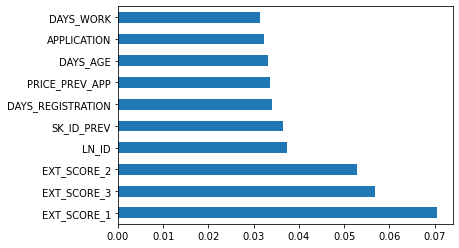

In [22]:
rf_model = RandomForestClassifier()
rf_model.fit(x,y)
feat_importances = pd.Series(rf_model.feature_importances_, index=x.columns)
df_imp_feat = feat_importances.nlargest(10)
# feat_importances.nlargest(10).plot(kind='barh')
df_imp_feat.plot(kind='barh')
plt.show()

## Note: 
### 1. A random forest is made from multiple decision trees (as given by n_estimators). Each tree individually predicts for the new data and random forest spits out the mean prediction from those trees. The idea for confidence level of predictions is just to see how much predictions coming from different trees are varying for the new observations. Then to analyze further, we can seek some pattern for observations which have highest variability of predictions.
### 2. In most of the cases, random forests can beat linear models for prediction. An objection frequently raised for random forests is interpretation of results as compared to linear models. But one can address the misconceived objection using the discussed methodologies of interpretation.
### 3. Feature selection is also known as attribute selection is a process of extracting the most relevant features from the dataset and then applying machine learning algorithms for the better performance of the model. A large number of irrelevant features increases the training time exponentially and increase the risk of overfitting.
### 4. Chi-square Test for Feature Extraction:
Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with best Chi-square scores. It determines if the association between two categorical variables of the sample would reflect their real association in the population.
### 5. ANOVA f-test Feature Selection, ANOVA is an acronym for “analysis of variance” and is a parametric statistical hypothesis test for determining whether the means from two or more samples of data (often three or more) come from the same distribution or not. An F-statistic, or F-test, is a class of statistical tests that calculate the ratio between variances values, such as the variance from two different samples or the explained and unexplained variance by a statistical test, like ANOVA. The ANOVA method is a type of F-statistic referred to here as an ANOVA f-test. Importantly, ANOVA is used when one variable is numeric and one is categorical, such as numerical input variables and a classification target variable in a classification task.

## From the feature selection, we understand that;
### 'EXT_SCORE_1 is the most important feature in this credit risk modelling as followed by 'EXT_SCORE_3' and 'EXT_SCORE_2'

<hr>